In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data_path = "/Users/weitongxuedemacbookpro/Documents/本科毕业论文/"

In [2]:
df_train = pd.read_csv(data_path + "cirrhosis-data/train-Cirrhosis.csv").drop(["id"], axis=1)
df_test = pd.read_csv(data_path + "cirrhosis-dataa/test-Cirrhosis.csv")
df_supp = pd.read_csv(data_path + "cirrhosis-data/cirrhosis.csv")[df_train.columns]

df_train = pd.concat([df_train,df_supp]).reset_index(drop=True)

LABEL = "Status"
CAT_FEATS = ["Drug", "Sex", "Ascites", "Hepatomegaly", "Spiders", "Edema", "Stage"]
NUM_FEATS = [x for x in df_train if x not in CAT_FEATS and x != LABEL]
ORG_FEATS = df_train.drop(LABEL, axis=1).columns.tolist()


print(f"Train shape: {df_train.shape}")
print(f"Test shape: {df_test.shape}\n")
df_train.head(10)

Train shape: (8323, 19)
Test shape: (5271, 19)



,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C
5,703,D-penicillamine,19270,F,N,Y,N,N,0.6,227.0,3.46,34.0,6456.2,60.63,68.0,213.0,11.5,3.0,D
6,1300,Placebo,17703,F,N,N,N,N,1.0,328.0,3.35,43.0,1677.0,137.95,90.0,291.0,9.8,3.0,C
7,1615,Placebo,21281,F,N,Y,N,N,0.6,273.0,3.94,36.0,598.0,52.70,214.0,227.0,9.9,3.0,C
8,2050,D-penicillamine,20684,F,N,N,N,N,0.7,360.0,3.65,72.0,3196.0,94.55,154.0,269.0,9.8,2.0,C
9,2615,D-penicillamine,15009,F,N,N,N,N,0.9,478.0,3.60,39.0,1758.0,171.00,140.0,234.0,10.6,2.0,C


## Impute missing values

In [3]:
df_train.isna().sum()

N_Days             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
Status             0
dtype: int64

In [12]:
df_supp.shape

(418, 19)

In [7]:
df_supp[df_supp["Drug"].isna()]

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
312,4062,NaN,21915,F,NaN,NaN,NaN,N,0.7,NaN,3.65,NaN,NaN,NaN,NaN,378.0,11.0,NaN,C
313,3561,NaN,23741,F,NaN,NaN,NaN,S,1.4,NaN,3.04,NaN,NaN,NaN,NaN,331.0,12.1,4.0,D
314,2844,NaN,19724,F,NaN,NaN,NaN,N,0.7,NaN,4.03,NaN,NaN,NaN,NaN,226.0,9.8,4.0,C
315,2071,NaN,27394,F,NaN,NaN,NaN,S,0.7,NaN,3.96,NaN,NaN,NaN,NaN,NaN,11.3,4.0,D
316,3030,NaN,22646,F,NaN,NaN,NaN,N,0.8,NaN,2.48,NaN,NaN,NaN,NaN,273.0,10.0,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,681,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0,D
414,1103,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0,C
415,1055,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0,C
416,691,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0,C


In [13]:
df_supp[df_supp['Tryglicerides'].isnull()]

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
13,1217,Placebo,20535,M,Y,Y,N,Y,0.8,NaN,2.27,43.0,728.0,71.00,NaN,156.0,11.0,4.0,D
39,4467,D-penicillamine,17046,F,N,N,N,N,1.3,NaN,3.34,105.0,11046.6,104.49,NaN,358.0,11.0,4.0,C
40,1350,D-penicillamine,12285,F,N,Y,N,N,6.8,NaN,3.26,96.0,1215.0,151.90,NaN,226.0,11.7,4.0,D
41,4453,Placebo,12307,F,N,Y,Y,N,2.1,NaN,3.54,122.0,8778.0,56.76,NaN,344.0,11.0,4.0,C
44,4025,Placebo,15265,F,N,N,N,N,0.6,NaN,3.93,19.0,1826.0,71.30,NaN,474.0,10.9,2.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,681,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0,D
414,1103,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0,C
415,1055,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0,C
416,691,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0,C


In [73]:
df_train_mod = df_train.copy()
df_test_mod = df_test.copy()

print(f"Train shape: {df_train_mod.shape}")
print(f"Test shape: {df_test_mod.shape}")

Train shape: (8323, 19)
Test shape: (5271, 19)


In [74]:
missing_value_true = ["Drug", "Ascites", "Hepatomegaly", "Spiders", 
                      "Cholesterol", "Copper", "Alk_Phos", "SGOT",
                      "Tryglicerides", "Platelets", "Prothrombin", "Stage"]

most_missing_value_true = missing_value_true[:-3]
most_missing_value_true

# for i, feats in enumerate(missing_value_true):
#     if df_train_mod[feats]:
#         df_train_mod.dropna(axis=1)

# train_missing_value = df_train[missing_value_true]
# train_missing_value.dropna()

df_train_mod.dropna(subset=["Drug", "Ascites", "Hepatomegaly", "Spiders", 
                      "Cholesterol", "Copper", "Alk_Phos", "SGOT",
                      "Tryglicerides"], how="all",inplace=True)

df_train_mod.dropna(subset=["Platelets"], how="all",inplace=True)

print(f"Train shape: {df_train_mod.shape}")
print(f"{df_train_mod.isna().sum()}")

Train shape: (8213, 19)
N_Days            0
Drug              0
Age               0
Sex               0
Ascites           0
Hepatomegaly      0
Spiders           0
Edema             0
Bilirubin         0
Cholesterol      28
Albumin           0
Copper            2
Alk_Phos          0
SGOT              0
Tryglicerides    30
Platelets         0
Prothrombin       0
Stage             0
Status            0
dtype: int64


In [108]:
df_train_mod.isna().sum()

N_Days            0
Drug              0
Age               0
Sex               0
Ascites           0
Hepatomegaly      0
Spiders           0
Edema             0
Bilirubin         0
Cholesterol      28
Albumin           0
Copper            2
Alk_Phos          0
SGOT              0
Tryglicerides    30
Platelets         0
Prothrombin       0
Stage             0
Status            0
dtype: int64

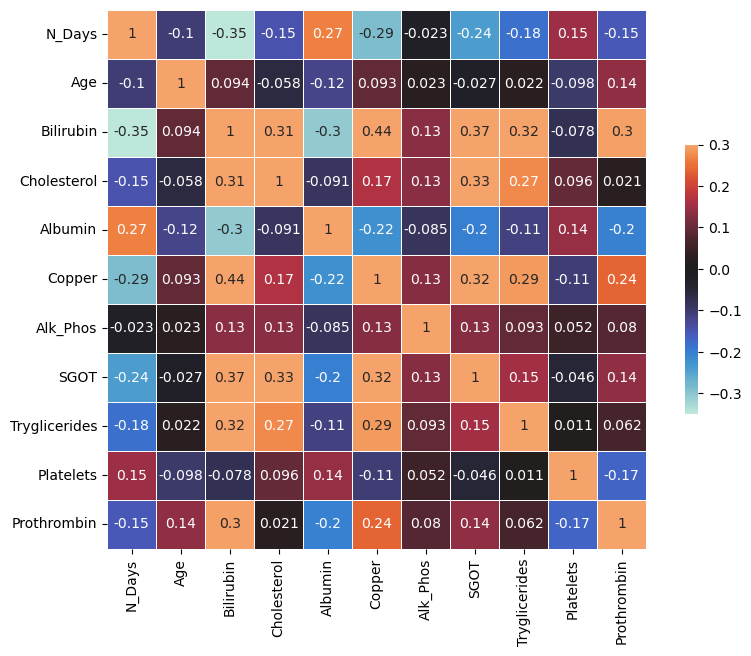

In [69]:
selected_features = [
    "N_Days", "Age", "Bilirubin", "Cholesterol", "Albumin", "Copper", 
    "Alk_Phos", "SGOT", "Tryglicerides", "Platelets", "Prothrombin"
]

train_corr_matrix = df_train[selected_features].corr()

mask = np.triu(np.ones_like(train_corr_matrix, dtype=bool))

f, ax = plt.subplots(figsize=(10,7))
sns.heatmap(train_corr_matrix,
#             mask=mask,
            annot=True, 
            vmax=.3, 
            center=0,
            square=True, 
            linewidths=.5, 
            cbar_kws={"shrink": .5}
)

plt.show()

In [78]:
# df_train_mod[df_train_mod["Cholesterol"].isna()]

In [84]:
feat_cholesterol = ["Bilirubin", "SGOT"]
df_train_mod[df_train_mod["Cholesterol"].notna() & 
             df_train_mod["SGOT"].notna()][feat_cholesterol]

,Bilirubin,SGOT
0,2.3,179.80
1,0.9,134.85
2,3.3,119.35
3,0.6,71.30
4,1.1,125.55
...,...,...
8212,0.4,91.00
8213,0.4,70.00
8214,1.7,171.00
8215,2.0,117.00


In [109]:
df_train_mod[df_train_mod["Cholesterol"].isna()]

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
7918,1217,Placebo,20535,M,Y,Y,N,Y,0.8,NaN,2.27,43.0,728.0,71.00,NaN,156.0,11.0,4.0,D
7944,4467,D-penicillamine,17046,F,N,N,N,N,1.3,NaN,3.34,105.0,11046.6,104.49,NaN,358.0,11.0,4.0,C
7945,1350,D-penicillamine,12285,F,N,Y,N,N,6.8,NaN,3.26,96.0,1215.0,151.90,NaN,226.0,11.7,4.0,D
7946,4453,Placebo,12307,F,N,Y,Y,N,2.1,NaN,3.54,122.0,8778.0,56.76,NaN,344.0,11.0,4.0,C
7949,4025,Placebo,15265,F,N,N,N,N,0.6,NaN,3.93,19.0,1826.0,71.30,NaN,474.0,10.9,2.0,C
7953,708,Placebo,22336,F,N,Y,N,N,0.8,NaN,3.82,58.0,678.0,97.65,NaN,233.0,11.0,4.0,D
7957,1000,D-penicillamine,24621,F,N,Y,N,N,2.6,NaN,3.10,94.0,6456.2,56.76,NaN,214.0,11.0,4.0,D
7974,3458,D-penicillamine,20600,F,N,N,N,N,0.6,NaN,4.64,20.0,666.0,54.25,NaN,265.0,10.6,2.0,C
7999,130,Placebo,16944,F,Y,Y,Y,Y,17.4,NaN,2.64,182.0,559.0,119.35,NaN,401.0,11.7,2.0,D
8000,3850,D-penicillamine,17841,F,N,N,N,N,1.0,NaN,3.70,33.0,1258.0,99.20,NaN,338.0,10.4,3.0,C


In [98]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer 
from sklearn.linear_model import LinearRegression
random_state = 42

df_cholesterol_missing = df_train_mod[df_train_mod["Cholesterol"].isna()]

target_cholesterol = "Cholesterol"
feat_cholesterol = ["Bilirubin", "SGOT"]

# set train and test split
cholesterol_X_train = df_train_mod[df_train_mod["Cholesterol"].notna() & 
                                   df_train_mod["SGOT"].notna()][feat_cholesterol]

cholesterol_X_test = df_cholesterol_missing[feat_cholesterol]

cholesterol_y_train = df_train_mod[df_train_mod["Cholesterol"].notna() & 
                                   df_train_mod["SGOT"].notna()][target_cholesterol]
# cholesterol_y_test = 

# fit the model
lm = LinearRegression()
lm.fit(X = cholesterol_X_train, y = cholesterol_y_train)
predict_cholesterol = lm.predict(cholesterol_X_test)

df_cholesterol_predict = pd.DataFrame(data=predict_cholesterol,
                                      columns=["Cholesterol"])

df_cholesterol_missing["Cholesterol"] = predict_cholesterol
df_cholesterol_missing["Cholesterol"] = df_cholesterol_missing["Cholesterol"].round(1)
df_cholesterol_missing

/var/folders/bl/ggtnn4196pz_6mzpn379bb7h0000gn/T/ipykernel_24107/1494984205.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cholesterol_missing["Cholesterol"] = predict_cholesterol
/var/folders/bl/ggtnn4196pz_6mzpn379bb7h0000gn/T/ipykernel_24107/1494984205.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cholesterol_missing["Cholesterol"] = df_cholesterol_missing["Cholesterol"].round(1)


,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
7918,1217,Placebo,20535,M,Y,Y,N,Y,0.8,287.5,2.27,43.0,728.0,71.00,NaN,156.0,11.0,4.0,D
7944,4467,D-penicillamine,17046,F,N,N,N,N,1.3,326.3,3.34,105.0,11046.6,104.49,NaN,358.0,11.0,4.0,C
7945,1350,D-penicillamine,12285,F,N,Y,N,N,6.8,434.0,3.26,96.0,1215.0,151.90,NaN,226.0,11.7,4.0,D
7946,4453,Placebo,12307,F,N,Y,Y,N,2.1,287.6,3.54,122.0,8778.0,56.76,NaN,344.0,11.0,4.0,C
7949,4025,Placebo,15265,F,N,N,N,N,0.6,285.6,3.93,19.0,1826.0,71.30,NaN,474.0,10.9,2.0,C
7953,708,Placebo,22336,F,N,Y,N,N,0.8,314.0,3.82,58.0,678.0,97.65,NaN,233.0,11.0,4.0,D
7957,1000,D-penicillamine,24621,F,N,Y,N,N,2.6,293.1,3.10,94.0,6456.2,56.76,NaN,214.0,11.0,4.0,D
7974,3458,D-penicillamine,20600,F,N,N,N,N,0.6,268.6,4.64,20.0,666.0,54.25,NaN,265.0,10.6,2.0,C
7999,130,Placebo,16944,F,Y,Y,Y,Y,17.4,518.1,2.64,182.0,559.0,119.35,NaN,401.0,11.7,2.0,D
8000,3850,D-penicillamine,17841,F,N,N,N,N,1.0,317.8,3.70,33.0,1258.0,99.20,NaN,338.0,10.4,3.0,C


In [106]:
from sklearn.ensemble import RandomForestRegressor

df_tryglicerides_missing = df_cholesterol_missing.copy()

target_tryglicerides = "Tryglicerides"
feat_tryglicerides = ["Bilirubin", "SGOT","Copper", "Cholesterol"]

# set train and test split
tryglicerides_X_train = df_train_mod[df_train_mod["Cholesterol"].notna() & 
                                     df_train_mod["SGOT"].notna() & 
                                     df_train_mod["Copper"].notna() &
                                     df_train_mod["Tryglicerides"].notna()][feat_tryglicerides]

tryglicerides_X_test = df_tryglicerides_missing[feat_tryglicerides]

tryglicerides_y_train = df_train_mod[df_train_mod["Cholesterol"].notna() & 
                                     df_train_mod["SGOT"].notna() & 
                                     df_train_mod["Copper"].notna() &
                                     df_train_mod["Tryglicerides"].notna()][target_tryglicerides]

# fit the model
rdf = RandomForestRegressor(random_state=42)
rdf.fit(X = tryglicerides_X_train, y = tryglicerides_y_train)
predict_tryglicerides = rdf.predict(tryglicerides_X_test)


df_tryglicerides_predict = pd.DataFrame(data=predict_tryglicerides,
                                      columns=["Cholesterol"])

df_tryglicerides_missing["Tryglicerides"] = predict_tryglicerides
df_tryglicerides_missing["Tryglicerides"] = df_tryglicerides_missing["Tryglicerides"].round(1)
df_tryglicerides_missing

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
7918,1217,Placebo,20535,M,Y,Y,N,Y,0.8,287.5,2.27,43.0,728.0,71.00,125.9,156.0,11.0,4.0,D
7944,4467,D-penicillamine,17046,F,N,N,N,N,1.3,326.3,3.34,105.0,11046.6,104.49,134.0,358.0,11.0,4.0,C
7945,1350,D-penicillamine,12285,F,N,Y,N,N,6.8,434.0,3.26,96.0,1215.0,151.90,127.2,226.0,11.7,4.0,D
7946,4453,Placebo,12307,F,N,Y,Y,N,2.1,287.6,3.54,122.0,8778.0,56.76,142.4,344.0,11.0,4.0,C
7949,4025,Placebo,15265,F,N,N,N,N,0.6,285.6,3.93,19.0,1826.0,71.30,86.7,474.0,10.9,2.0,C
7953,708,Placebo,22336,F,N,Y,N,N,0.8,314.0,3.82,58.0,678.0,97.65,125.3,233.0,11.0,4.0,D
7957,1000,D-penicillamine,24621,F,N,Y,N,N,2.6,293.1,3.10,94.0,6456.2,56.76,135.0,214.0,11.0,4.0,D
7974,3458,D-penicillamine,20600,F,N,N,N,N,0.6,268.6,4.64,20.0,666.0,54.25,92.4,265.0,10.6,2.0,C
7999,130,Placebo,16944,F,Y,Y,Y,Y,17.4,518.1,2.64,182.0,559.0,119.35,126.4,401.0,11.7,2.0,D
8000,3850,D-penicillamine,17841,F,N,N,N,N,1.0,317.8,3.70,33.0,1258.0,99.20,116.4,338.0,10.4,3.0,C


In [107]:
df_tryglicerides_missing.isna().sum()

N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
Status           0
dtype: int64

In [103]:
# df_train_mod[df_train_mod["Cholesterol"].isna()]

In [130]:
# df_train_mod_1 = df_train_mod.copy()

df_train_mod = df_train_mod.fillna(df_tryglicerides_missing)

df_train_mod.dropna(inplace=True)

df_train_mod.isna().sum()

N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
Status           0
dtype: int64

In [119]:
df_train_mod_1

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8212,1153,D-penicillamine,22347,F,N,Y,N,N,0.4,246.0,3.58,24.0,797.0,91.00,113.0,288.0,10.4,2.0,C
8213,994,Placebo,21294,F,N,N,N,N,0.4,260.0,2.75,41.0,1166.0,70.00,82.0,231.0,10.8,2.0,C
8214,939,D-penicillamine,22767,F,N,N,N,N,1.7,434.0,3.35,39.0,1713.0,171.00,100.0,234.0,10.2,2.0,C
8215,839,D-penicillamine,13879,F,N,N,N,N,2.0,247.0,3.16,69.0,1050.0,117.00,88.0,335.0,10.5,2.0,C


In [126]:
df_train_mod_1['Drug'].value_counts(), df_train_mod_1['Edema'].value_counts(), 

(Placebo            4160
 D-penicillamine    4049
 Name: Drug, dtype: int64,
 N    7417
 S     427
 Y     365
 Name: Edema, dtype: int64)

---
## Label encoding
* **One-hot-Encoding** for features: `Edema`        
* **Ordinal Encoding** for features: `Stage`        
* **Binary-Encoding** for features: `Drug`, `Sex`,`Ascites`,`Hepatomegaly`,`Spiders`   
* **LabelEncoding** for label: `Status`     

In [132]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

In [131]:
df_train_mod.isna().sum()

N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
Status           0
dtype: int64

In [133]:
# Encode the label
label_encoder = LabelEncoder()
df_train_mod[LABEL] = label_encoder.fit_transform(df_train_mod[LABEL])

In [134]:
encoders = {
    'Drug': OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1, categories=[['Placebo', 'D-penicillamine']]),
    'Sex': OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),
    'Ascites': OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),
    'Hepatomegaly': OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),
    'Spiders': OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),
    # 'Edema': OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1, categories=[['N', 'S', 'Y']]),
    'Edema': OneHotEncoder(),
    'Stage': OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
}

In [135]:
for feat, enc in encoders.items():
    if isinstance(enc, OrdinalEncoder):
        df_train_mod[feat] = enc.fit_transform(df_train_mod[[feat]]).astype('int32')
        df_test_mod[feat] = enc.transform(df_test_mod[[feat]]).astype('int32')
    if isinstance(enc, OneHotEncoder):
        # Transform and get new column names
        new_cols = enc.fit_transform(df_train_mod[[feat]]).toarray().astype('int8')
        # col_names = [f"{feat}_{cat}" for cat in enc.categories_[0]]
        col_names = enc.get_feature_names_out()
        
        # Add new columns to the dataframe
        df_train_mod[col_names] = new_cols
        df_train_mod.drop(feat, axis=1, inplace=True)  # Drop original column
        
        # Repeat for the test set
        new_cols_test = enc.transform(df_test_mod[[feat]]).toarray().astype('int8')
        df_test_mod[col_names] = new_cols_test
        df_test_mod.drop(feat, axis=1, inplace=True)

In [145]:
print(f'The shape of train set {df_train_mod.shape}')
print(f'The shape of test set {df_test_mod.shape}')

The shape of train set (8209, 21)
The shape of test set (5271, 21)


---
## Aditional Features

In [149]:
df_train_mod["Status"].value_counts()

0    5128
2    2787
1     294
Name: Status, dtype: int64

In [151]:
df_train["Status"].value_counts()

C     5197
D     2826
CL     300
Name: Status, dtype: int64

In [152]:
normal_ranges = { #As mentioned in the earlier section.
    'Bilirubin': (0.1, 1.2),
    'Cholesterol': (125, 200),
    'Albumin': (3.4, 5.4),
    'Copper': (10, 30),
    'Alk_Phos': (40, 129),
    'SGOT': (8, 45),
    'Tryglicerides': (48.68, 168.15),
    'Platelets': (150, 400),
    'Prothrombin': (11,13.5)
}

In [155]:
from sklearn.base import BaseEstimator, ClassifierMixin, TransformerMixin
from sklearn.pipeline import make_pipeline, Pipeline

class DiagnosisDateTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X['Diagnosis_Date'] = X['Age'] - X['N_Days']
        return X
    
class AgeYearsTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X['Age_Years'] = round(X['Age'] / 365.25).astype("int16")
        return X

class AgeGroupsTransformer(BaseEstimator, TransformerMixin):
    """Older people might be hit harder (interaction) by health issues. Also can cover lifestyle influences, i.e.
    alcohol consumption etc."""
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        # Use years from above, min=26, max=78
        X['Age_Group'] = pd.cut(X['Age_Years'], bins=[19, 29, 49, 64, 99], labels = [0, 1, 2, 3]).astype('int16')
        return X

class BilirubinAlbuminTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X['Bilirubin_Albumin'] = X['Bilirubin'] * X['Albumin']
        return X
class DrugEffectivenessTransformer(BaseEstimator, TransformerMixin):
    # Placeholder concept, assuming 'Bilirubin' improvement is a measure of effectiveness
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X['Drug_Effectiveness'] = X['Drug'] * X['Bilirubin']
        return X

class SymptomScoreTransformer(BaseEstimator, TransformerMixin):
    # From data set explanations above let's add all the "bad" symptoms
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        # symptom_columns = ['Ascites', 'Hepatomegaly', 'Spiders', 'Edema']
        symptom_columns = ['Ascites', 'Hepatomegaly', 'Spiders', 'Edema_N', 'Edema_S', 'Edema_Y']
        X['Symptom_Score'] = X[symptom_columns].sum(axis=1)
        return X
    
class SymptomCatTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.symptom_columns = ['Ascites', 'Hepatomegaly', 'Spiders', 'Edema_N', 'Edema_S', 'Edema_Y']
        self.encoder = OneHotEncoder(handle_unknown='ignore')

    def fit(self, X, y=None):
        X_copy = X.copy()
        symptom_scores = X_copy[self.symptom_columns].apply(lambda row: ''.join(row.values.astype(str)), axis=1)
        self.encoder.fit(symptom_scores.values.reshape(-1, 1))
        return self
    def transform(self, X):
        X_transformed = X.copy()
        symptom_scores = X_transformed[self.symptom_columns].apply(lambda row: ''.join(row.values.astype(str)), axis=1)
        
        encoded_features = self.encoder.transform(symptom_scores.values.reshape(-1, 1)).toarray().astype("int8")
        encoded_feature_names = self.encoder.get_feature_names_out(input_features=['Symptom_Score'])

        # Drop the original symptom columns and add the new encoded features
        # X_transformed.drop(columns=self.symptom_columns, inplace=True)
        X_transformed[encoded_feature_names] = pd.DataFrame(encoded_features, index=X_transformed.index)
        
        return X_transformed
class LiverFunctionTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        liver_columns = ['Bilirubin', 'Albumin', 'Alk_Phos', 'SGOT']
        X['Liver_Function_Index'] = X[liver_columns].mean(axis=1)
        return X

class RiskScoreTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X['Risk_Score'] = X['Bilirubin'] + X['Albumin'] - X['Alk_Phos']
        return X

class TimeFeaturesTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X['Diag_Year'] = (X['N_Days'] / 365).astype(int)
        X['Diag_Month'] = ((X['N_Days'] % 365) / 30).astype(int)
        return X
class ScalingTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.scaler = StandardScaler()
        self.num_feats = NUM_FEATS + ['Diagnosis_Date', 'Age_Years', 'Bilirubin_Albumin', 'Drug_Effectiveness', 
                                      'Symptom_Score', 'Liver_Function_Index', 'Risk_Score', 'Diag_Year', 'Diag_Month']

    def fit(self, X, y=None):
        self.scaler.fit(X[self.num_feats])
        return self

    def transform(self, X):
        X_scaled = X.copy()
        X_scaled[self.num_feats] = self.scaler.transform(X_scaled[self.num_feats])
        return X_scaled
# Define the pipeline
pipeline = Pipeline([
    ('diagnosis_date', DiagnosisDateTransformer()),
    ('age_years', AgeYearsTransformer()),
    ('age_groups', AgeGroupsTransformer()),
    ('bilirubin_albumin', BilirubinAlbuminTransformer()),
    ('drug_effectiveness', DrugEffectivenessTransformer()),
    ('symptom_score', SymptomScoreTransformer()),
    ('symptom_cat_score', SymptomCatTransformer()),
    ('liver_function', LiverFunctionTransformer()),
    ('risk_score', RiskScoreTransformer()),
    ('time_features', TimeFeaturesTransformer()),
    #('scaling', ScalingTransformer()),
    # ... ?
])

# Apply the pipeline to your dataframes
df_train_mod = pipeline.fit_transform(df_train_mod)
df_test_mod = pipeline.transform(df_test_mod)

# Update the CAT_FEATS
CAT_FEATS = ['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Stage', #old
             'Age_Group', 'Symptom_Score'] # new 
# Update the NUM_FEATS ????


In [156]:
df_train_mod

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,Cholesterol,Albumin,...,Symptom_Score_110001,Symptom_Score_110010,Symptom_Score_110100,Symptom_Score_111001,Symptom_Score_111010,Symptom_Score_111100,Liver_Function_Index,Risk_Score,Diag_Year,Diag_Month
0,999,1,21532,1,0,0,0,2.3,316.0,3.35,...,0,0,0,0,0,0,446.6125,-1595.35,2,8
1,2574,0,19237,0,0,0,0,0.9,364.0,3.54,...,0,0,0,0,0,0,394.8225,-1435.56,7,0
2,3428,0,13727,0,0,1,1,3.3,299.0,3.55,...,0,0,0,0,0,0,288.8000,-1022.15,9,4
3,2576,0,18460,0,0,0,0,0.6,256.0,3.50,...,0,0,0,0,0,0,432.1000,-1648.90,7,0
4,788,0,16658,0,0,1,0,1.1,346.0,3.65,...,0,0,0,0,0,0,327.8250,-1176.25,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8212,1153,1,22347,0,0,1,0,0.4,246.0,3.58,...,0,0,0,0,0,0,222.9950,-793.02,3,1
8213,994,0,21294,0,0,0,0,0.4,260.0,2.75,...,0,0,0,0,0,0,309.7875,-1162.85,2,8
8214,939,1,22767,0,0,0,0,1.7,434.0,3.35,...,0,0,0,0,0,0,472.2625,-1707.95,2,6
8215,839,1,13879,0,0,0,0,2.0,247.0,3.16,...,0,0,0,0,0,0,293.0400,-1044.84,2,3


In [161]:
df_train_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8062 entries, 0 to 8061
Data columns (total 55 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   N_Days                8062 non-null   int64  
 1   Drug                  8062 non-null   int32  
 2   Age                   8062 non-null   int64  
 3   Sex                   8062 non-null   int32  
 4   Ascites               8062 non-null   int32  
 5   Hepatomegaly          8062 non-null   int32  
 6   Spiders               8062 non-null   int32  
 7   Bilirubin             8062 non-null   float64
 8   Cholesterol           8062 non-null   float64
 9   Albumin               8062 non-null   float64
 10  Copper                8062 non-null   float64
 11  Alk_Phos              8062 non-null   float64
 12  SGOT                  8062 non-null   float64
 13  Tryglicerides         8062 non-null   float64
 14  Platelets             8062 non-null   float64
 15  Prothrombin          

---
## Outlier Detection & Removal

In [157]:
tmp_df = df_train_mod.copy()

# Calculate the mean and standard deviation for each column
means = tmp_df[NUM_FEATS].mean()
std_devs = tmp_df[NUM_FEATS].std()

# Define a threshold for what you consider to be an outlier, typically 3 standard deviations from the mean
n_stds = 6
thresholds = n_stds * std_devs

# Detect outliers
outliers = (np.abs(tmp_df[NUM_FEATS] - means) > thresholds).any(axis=1)

print(f"Detected {sum(outliers)} that are more than {n_stds} SDs away from mean...")

Detected 147 that are more than 6 SDs away from mean...


In [158]:
# The resulting boolean series can be used to filter out the outliers
outliers_df = tmp_df[outliers]

# Overwrite the train data
df_train_mod = tmp_df[~outliers].reset_index(drop=True)
print(f"Train data shape after outlier removal: {df_train_mod.shape}")


Train data shape after outlier removal: (8062, 55)


---
## Dimensionality Reduction

In [164]:
from sklearn.decomposition import PCA

def tsne_with_feature_selection_and_pca(data, num_feats, target_column, n_components=2, top_n_features=10, pca_components=None):
    """
    Select top features based on feature importance, optionally apply PCA, and then use t-SNE for visualization.

    Parameters:
    data (DataFrame): The input data.
    num_feats (list): List of numerical feature column names.
    target_column (str): The name of the target column.
    n_components (int): Number of dimensions for t-SNE (2 or 3). Default is 2.
    top_n_features (int): Number of top features to select based on importance. Default is 10.
    pca_components (int or None): Number of PCA components to retain before applying t-SNE. If None, PCA is not applied.
    """
    
    global label_encoder
    
    # Standardizing the numerical features
    scaler = StandardScaler()
    numerical_data_scaled = scaler.fit_transform(data[num_feats])

    # Random Forest for feature importances
    rf = RandomForestClassifier(random_state=42)
    rf.fit(numerical_data_scaled, data[target_column])
    importances = rf.feature_importances_

    # Selecting top_n_features
    indices = np.argsort(importances)[-top_n_features:]
    selected_features = [num_feats[i] for i in indices]

    # Data for t-SNE
    tsne_data = numerical_data_scaled[:, indices]

    # Optionally applying PCA
    if pca_components is not None and pca_components < len(selected_features):
        pca = PCA(n_components=pca_components)
        tsne_data = pca.fit_transform(tsne_data)
        
     # Applying t-SNE
    tsne = TSNE(n_components=n_components, learning_rate='auto', init='random', perplexity=30, random_state=42)
    tsne_results = tsne.fit_transform(tsne_data)

    # Creating a DataFrame for the t-SNE results
    tsne_df = pd.DataFrame(tsne_results, columns=[f'Component {i+1}' for i in range(n_components)])
    tsne_df[target_column] = label_encoder.inverse_transform(data[target_column].values)

    # Visualizing using Plotly
    if n_components == 3:
        fig = px.scatter_3d(tsne_df, x='Component 1', y='Component 2', z='Component 3', color=target_column)
    else:
        fig = px.scatter(tsne_df, x='Component 1', y='Component 2', color=target_column)
    
    fig.update_layout(width=800, height=600)
    fig.show()

df_train_red = df_train_mod
# tsne_with_feature_selection_and_pca(df_train_red, NUM_FEATS, LABEL, n_components=3, top_n_features=10, pca_components=None)


In [165]:
# Features to combine 
# All
#df_train_pca = df_train_mod.drop([LABEL], axis=1)
#df_test_pca = df_test_mod

# Numerical feats
df_train_pca = df_train_mod[NUM_FEATS]
df_test_pca = df_test_mod[NUM_FEATS]

# Some, the feats here are taken iteratively from previous runs
#FEATS = ['Platelets', 'Copper', 'Alk_Phos', 'Diagnosis_Date', 'SGOT', 'Age', 'N_Days']
#PCA_FEATS = [c for c in df_train_mod.drop(LABEL, axis=1).columns.values if c not in FEATS]
#df_train_pca = df_train_mod[PCA_FEATS]
#df_test_pca = df_test_mod[PCA_FEATS]

pca = PCA(n_components=10)
df_train_pca = pca.fit_transform(df_train_pca)
df_test_pca = pca.transform(df_test_pca)

print(f"Explained variance per component: {np.round(pca.explained_variance_ratio_, 1)}")

Explained variance per component: [0.7 0.2 0.1 0.  0.  0.  0.  0.  0.  0. ]


In [167]:
eps_expl_var_treshold = 0
n_pcas = np.sum(np.round(pca.explained_variance_ratio_, 3) > eps_expl_var_treshold)
pca_c_names = [f"PCA_{i}" for i in range(n_pcas)]
print(f"PCA column names: {pca_c_names}")
df_train_mod[pca_c_names] = df_train_pca[:,0:n_pcas]
df_test_mod[pca_c_names] = df_test_pca[:,0:n_pcas]

PCA column names: ['PCA_0', 'PCA_1', 'PCA_2', 'PCA_3']


## Store Feature Engineering Results

In [169]:
# Store modified (not resampled)
DATA_VERSION = 24

df_train_mod.to_csv(f"train_mod_v{DATA_VERSION}.csv")
df_test_mod.to_csv(f"test_mod_v{DATA_VERSION}.csv")